An algorithm to generate isochrones i.e. the area accessible in public transportation from a given point (latitude + longitude) and date during a given time. 
Data generated thanks to Navitia API http://doc.navitia.io/#isochrones-currently-in-beta

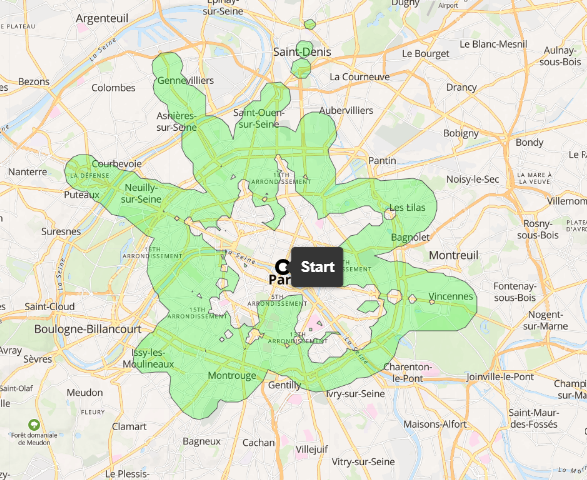

### Importing libraries

In [3]:
import requests
import pandas as pd
import os
import json


### Path and API access

First, you have to create an account in https://navitia.io/ to generate a token

In [24]:
df = pd.read_csv('C:\\Users\\pblancha\\test_navitia.csv',sep=';',encoding='1252')

outputpath = 'C:\\Users\\pblancha\\'

boundary_duration =[3000] #Set the different periods en seconds 

token= 'bdb45ed3-5ae2-49dd-a083-59c73a489220' #the token to be used to access the API (account creation mandatory)

head = {'Authorization': token} 
print(df)

    latitude  longitude
0  48.852497   2.343179


Specify the date you wish so the isochrone takes it into account

In [25]:
date = input("Enter a date (YYYYMMDD):")
print("Date is: " + date)
mydate= date+'T000000'
print(mydate)

Enter a date (YYYYMMDD):20220628
Date is: 20220628
20220628T000000


Run the cell !

In [26]:
for longitude, latitude in (zip(df.longitude,df.latitude)):
    print(longitude, latitude)
    url = 'https://api.navitia.io/v1/coverage/fr-idf/isochrones?from='+str(longitude)+';'+str(latitude)+'&boundary_duration[]='+str(boundary_duration[0])#+'&boundary_duration[]='+str(boundary_duration[1])#+'&boundary_duration[]='+str(boundary_duration[2])+'&boundary_duration[]='+str(boundary_duration[3])
    print(response)
    response = requests.get(url,headers=head)
    response = response.json()
    if len(response)>1:
        response = response['isochrones']
        for bound in range(len(boundary_duration)):
            print(bound)
            mygeojson = response[bound]['geojson']
            with open(os.path.join(outputpath, 'iso_Navitia_'+str(boundary_duration[bound])+'_'+'.json'), 'w')  as f:
                f.write(json.dumps(mygeojson))

2.343179 48.852497
[{'max_duration': 3000, 'from': {'embedded_type': 'address', 'id': '2.343179;48.852497', 'quality': 0, 'name': 'Impasse Hautefeuille (Paris)', 'address': {'name': 'Impasse Hautefeuille', 'house_number': 0, 'coord': {'lat': '48.852497', 'lon': '2.343179'}, 'label': 'Impasse Hautefeuille (Paris)', 'administrative_regions': [{'insee': '75056', 'name': 'Paris', 'level': 8, 'coord': {'lat': '48.853495', 'lon': '2.348391'}, 'label': 'Paris (75000-75116)', 'id': 'admin:fr:75056', 'zip_code': '75000;75001;75002;75003;75004;75005;75006;75007;75008;75009;75010;75011;75012;75013;75014;75015;75016;75017;75018;75019;75020;75116'}], 'id': '2.343179;48.852497'}}, 'geojson': {'type': 'MultiPolygon', 'coordinates': [[[[2.3148059814, 48.9270521118], [2.3148252624, 48.9270518905], [2.3148444392, 48.9270512289], [2.3148636601, 48.9270501256], [2.3148827594, 48.9270485837], [2.3149017869, 48.9270466045], [2.3149206957, 48.92704419], [2.3149394571, 48.9270413437], [2.314958061, 48.9270380

0


Isochrones have been generated in JSON format ! 